In [1]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data using yfinance
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index to turn the Date index into a column
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


#  Question 2: Use Webscraping to Extract Tesla Revenue Data
### Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [9]:
import requests
from bs4 import BeautifulSoup


url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
tables = soup.find_all('table')

revenue_table = None
for table in tables:
    if 'Tesla Quarterly Revenue' in table.text:
        revenue_table = table
        break

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

if revenue_table:
    rows = []
    for row in revenue_table.find_all('tr')[1:]:
        cols = row.find_all('td')
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace('$', '').replace(',', '')
            rows.append({"Date": date, "Revenue": revenue})
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame(rows)], ignore_index=True)

print(tesla_revenue.tail())


          Date Revenue
59  2010-06-30      28
60  2010-03-31      21
61  2009-12-31        
62  2009-09-30      46
63  2009-06-30      27


# Q3 Use yfinance to Extract Stock Data

In [10]:
import yfinance as yf

# Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index to make Date a column
gme_data.reset_index(inplace=True)

# Display first five rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


# Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.



In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/114.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.find_all('table')

gme_revenue_table = None
for table in tables:
    if 'GameStop Quarterly Revenue' in table.text:
        gme_revenue_table = table
        break

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

if gme_revenue_table:
    rows = []
    for row in gme_revenue_table.find_all('tr')[1:]:
        cols = row.find_all('td')
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace('$', '').replace(',', '')
            rows.append({"Date": date, "Revenue": revenue})
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame(rows)], ignore_index=True)

print(gme_revenue.tail())


          Date Revenue
61  2010-01-31    3524
62  2009-10-31    1835
63  2009-07-31    1739
64  2009-04-30    1981
65  2009-01-31    3492


# Question 5: Plot Tesla Stock Graph


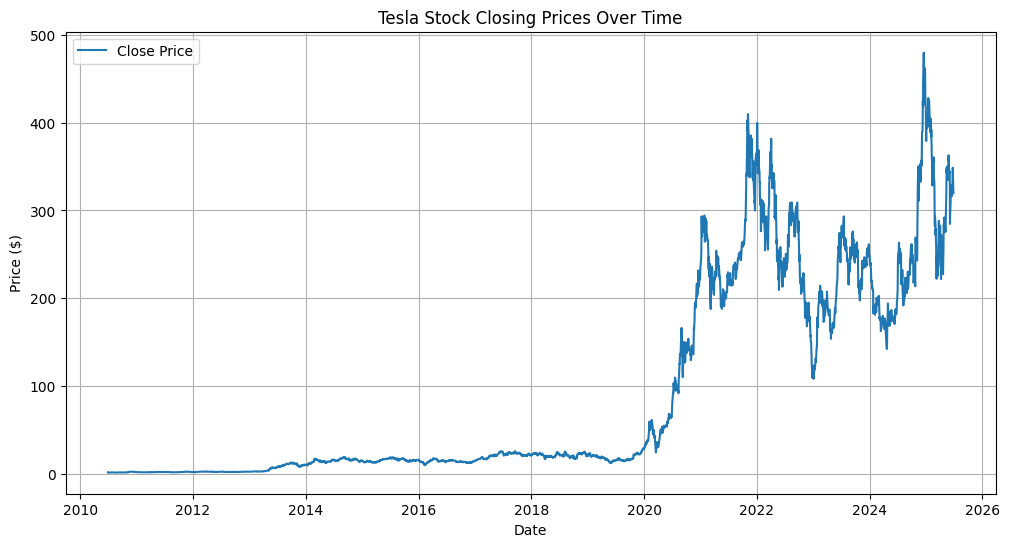

In [12]:
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(12,6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming you have tesla_data from previous steps with 'Date' and 'Close' columns
make_graph(tesla_data, "Tesla Stock Closing Prices Over Time")


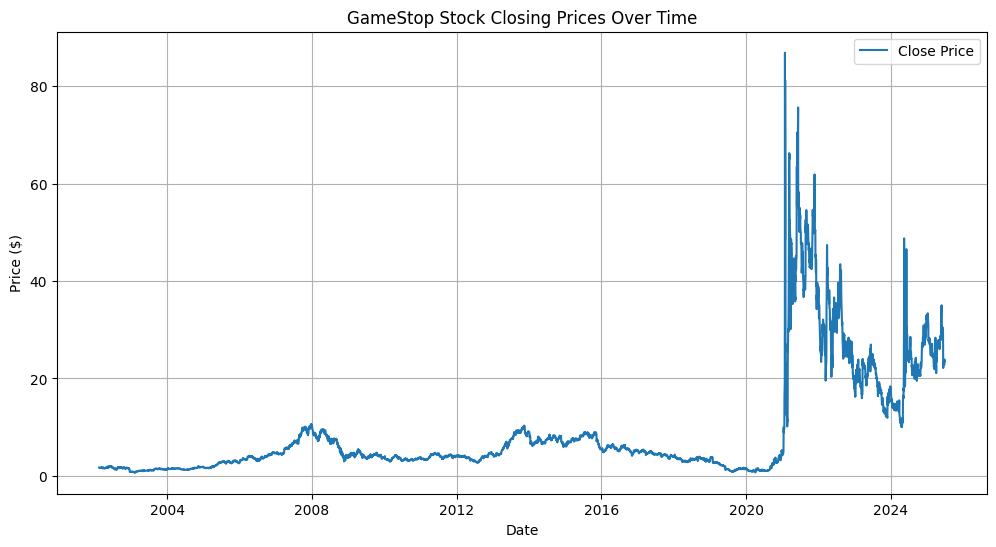

In [13]:
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(12,6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming gme_data is the DataFrame with GameStop stock data and columns 'Date' and 'Close'
make_graph(gme_data, "GameStop Stock Closing Prices Over Time")
